In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Adding Gaussian Noise

In [16]:
# Load the image in grayscale
image = cv2.imread("/content/hera_pheri_Sh8DBP3.jpg",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(256,256))

In [17]:
# function to add Gaussian Noise
def add_gaussian_noise(image, mean=0, std_dev=25):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# fuction to apply gaussian blur (denoising)
def gaussian_denoise(img, ksize=5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

# function to apply median filtering
def median_denoise(img, ksize=5):
    return cv2.medianBlur(img, ksize)


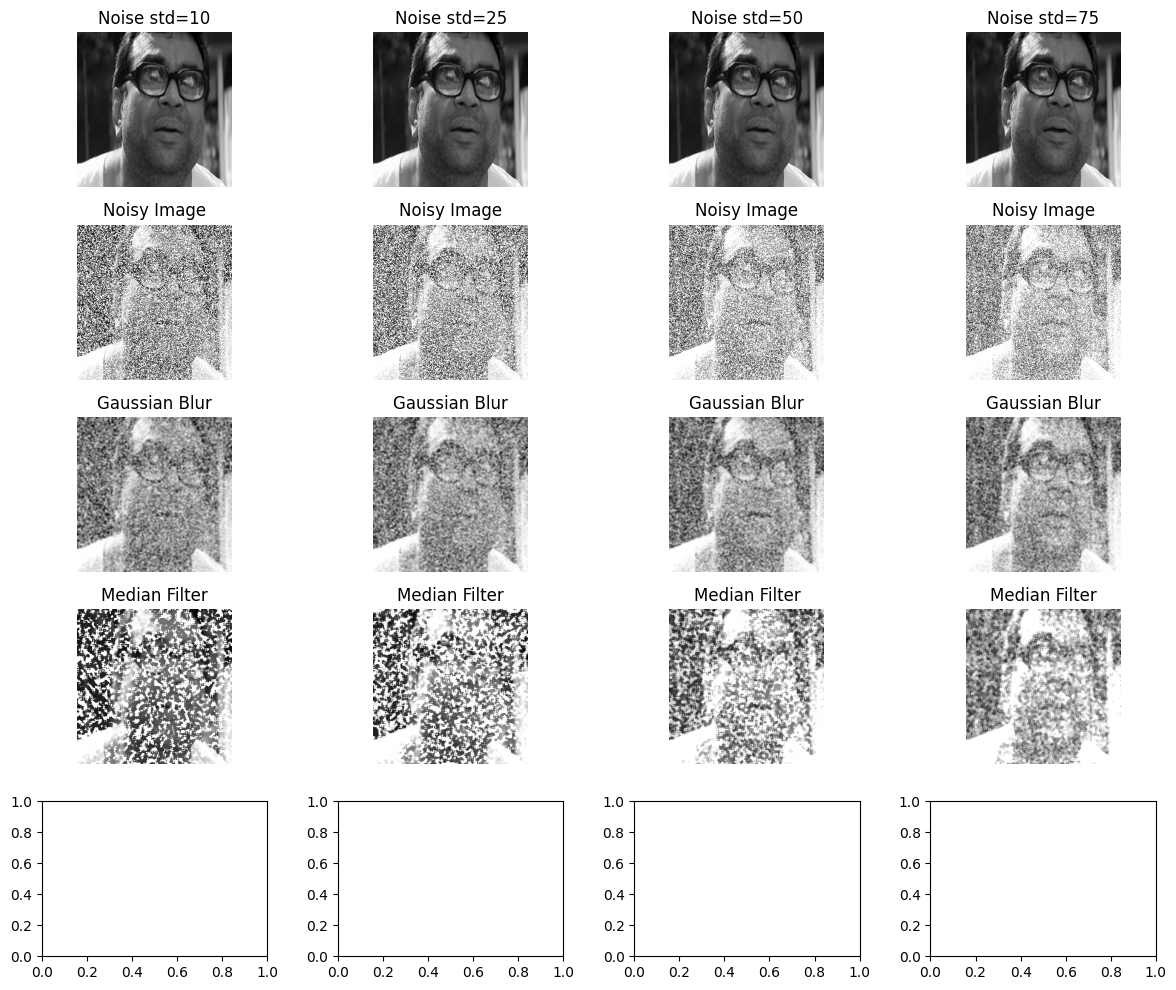

In [18]:
# apply noise at different levels
noise_levels = [10, 25, 50, 75]
noisy_image = [add_gaussian_noise(image, std_dev=std_dev) for std_dev in noise_levels]

# apply denoising filters
gaussian_denoised = [gaussian_denoise(img) for img in noisy_image]
median_denoised = [median_denoise(img) for img in noisy_image]

#plot results
fig, axes = plt.subplots(5, len(noise_levels), figsize=(12, 10))

# original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i in range(len(noise_levels)):
    axes[0,i].imshow(image, cmap='gray')
    axes[0,i].set_title(f"Noise std={noise_levels[i]}")
    axes[0,i].axis('off')

    axes[1,i].imshow(noisy_image[i], cmap='gray')
    axes[1,i].set_title(f"Noisy Image")
    axes[1,i].axis('off')

    axes[2,i].imshow(gaussian_denoised[i], cmap='gray')
    axes[2,i].set_title(f"Gaussian Blur")
    axes[2,i].axis('off')

    axes[3,i].imshow(median_denoised[i], cmap='gray')
    axes[3,i].set_title(f"Median Filter")
    axes[3,i].axis('off')

plt.tight_layout()
plt.show()

# Forward Diffusion Process

In [ ]:
image = cv2.imread("/content/hera_pheri_Sh8DBP3.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256)).astype(np.float32) / 255.0  # Normalize to [0,1]

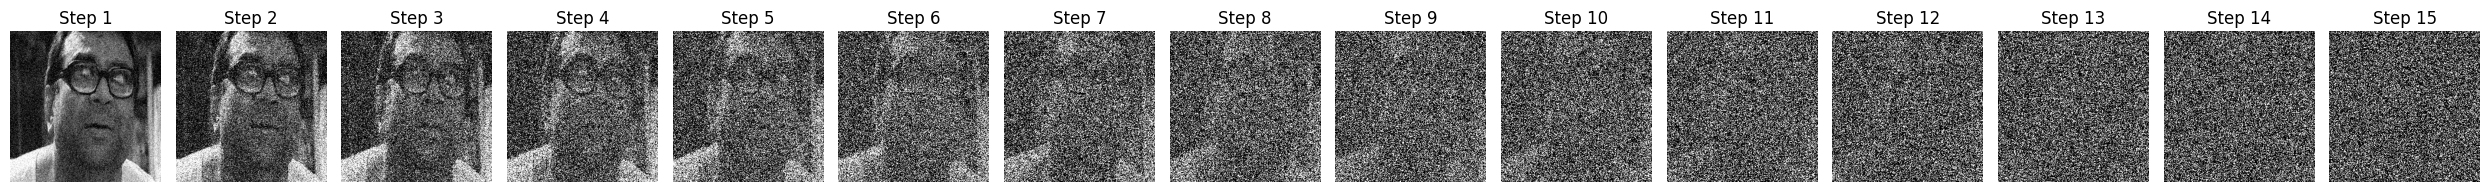

In [19]:
# Function to apply forward diffusion with extreme noise
def forward_diffusion(image, num_steps=15, beta_start=0.01, beta_end=0.5):
    h, w = image.shape
    betas = np.linspace(beta_start, beta_end, num_steps)
    alphas = 1.0 - betas
    alpha_bars = np.cumprod(alphas)

    diffusion_images = []

    for t in range(num_steps):
        noise = np.random.normal(0, 1, (h, w))  # gaussian noise matrix
        noisy_image = np.sqrt(alpha_bars[t]) * image + np.sqrt(1 - alpha_bars[t]) * noise # blends og image with noise
        diffusion_images.append(np.clip(noisy_image, 0, 1))  # all pixel values between range [0,1]

    return diffusion_images

# Increase steps and noise intensity
num_steps = 15
diffusion_images = forward_diffusion(image, num_steps=num_steps)

# Plot results
fig, axes = plt.subplots(1, num_steps, figsize=(25, 5))

for i in range(num_steps):
    axes[i].imshow(diffusion_images[i], cmap='gray')
    axes[i].set_title(f"Step {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()
